<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [16]:
import extinction
import numpy as np
import pandas as pd
from astropy import constants
from astropy import units as u
from astropy import units

import extinction
import numpy as np

uvot_bands=['uw2','um2','uw1','uuu']
wave1=np.array([1928,2246,2600,3465])# w2,m2,w1,u
#wave1=np.array([2246,3465,2600,1928])# um2,u,uw1,uw2
extinction1=extinction.fm07(wave1, 0.075, unit='aa')#NED
print(extinction1)

wave1=np.array([1928,2246,2600,3465])# w2,m2,w1,u
extinction2=extinction.fm07(wave1, 0.113, unit='aa')# Noda 2018
print(extinction2)

uvot_uw2=pd.read_csv('/home/brettlv/python_code/Mrk1018/data/uvot_uw2_sum.csv',sep='|',header=0)
uvot_um2=pd.read_csv('/home/brettlv/python_code/Mrk1018/data/uvot_um2_sum.csv',sep='|',header=0)
uvot_uw1=pd.read_csv('/home/brettlv/python_code/Mrk1018/data/uvot_uw1_sum.csv',sep='|',header=0)
uvot_uuu=pd.read_csv('/home/brettlv/python_code/Mrk1018/data/uvot_uuu_sum.csv',sep='|',header=0)

f_uw2=(constants.c/(1928*units.AA)).to(u.Hz).value
f_um2=(constants.c/(2246*units.AA)).to(u.Hz).value
f_uw1=(constants.c/(2600*units.AA)).to(u.Hz).value
f_uuu=(constants.c/(3465*units.AA)).to(u.Hz).value


uvot_uw2.columns=['0','band','mjd','mag', 'mag_err','mjy', 'mjy_err','rate','rate_err', '9']
uvot_uw2['flux']=f_uw2*uvot_uw2['mjy']*10**(-26)
uvot_uw2['band']='uw2'
uvot_uw2['freq']=f_uw2
uvot_uw2['f_err']=f_uw2*uvot_uw2['mjy_err']*10**(-26)

uvot_uw2['mag_ext_cor']=uvot_uw2['mag']-extinction2[0]
uvot_uw2['mjy_ext_cor']=10**((-48.6-uvot_uw2['mag_ext_cor'])/2.5+26)
uvot_uw2['flux_ext_cor']=f_uw2*uvot_uw2['mjy_ext_cor']*10**(-26)
######################

uvot_um2.columns=['0','band','mjd','mag', 'mag_err','mjy', 'mjy_err','rate','rate_err', '9']
uvot_um2['flux']=f_um2*uvot_um2['mjy']*10**(-26)
uvot_um2['band']='um2'
uvot_um2['freq']=f_um2
uvot_um2['f_err']=f_um2*uvot_um2['mjy_err']*10**(-26)

uvot_um2['mag_ext_cor']=uvot_um2['mag']-extinction2[1]

uvot_um2['mjy_ext_cor']=10**((-48.6-uvot_um2['mag_ext_cor'])/2.5+26)
uvot_um2['flux_ext_cor']=f_um2*uvot_um2['mjy_ext_cor']*10**(-26)
######################
uvot_uw1.columns=['0','band','mjd','mag', 'mag_err','mjy', 'mjy_err','rate','rate_err', '9']
uvot_uw1['flux']=f_uw1*uvot_uw1['mjy']*10**(-26)
uvot_uw1['band']='uw1'
uvot_uw1['freq']=f_uw1
uvot_uw1['f_err']=f_uw1*uvot_uw1['mjy_err']*10**(-26)

uvot_uw1['mag_ext_cor']=uvot_uw1['mag']-extinction2[2]
uvot_uw1['mjy_ext_cor']=10**((-48.6-uvot_uw1['mag_ext_cor'])/2.5+26)
uvot_uw1['flux_ext_cor']=f_uw1*uvot_uw1['mjy_ext_cor']*10**(-26)
######################
uvot_uuu.columns=['0','band','mjd','mag', 'mag_err','mjy', 'mjy_err','rate','rate_err', '9']
uvot_uuu['flux']=f_uuu*uvot_uuu['mjy']*10**(-26)
uvot_uuu['band']='uuu'
uvot_uuu['freq']=f_uuu
uvot_uuu['f_err']=f_uuu*uvot_uuu['mjy_err']*10**(-26)

uvot_uuu['mag_ext_cor']=uvot_uuu['mag']-extinction2[3]
uvot_uuu['mjy_ext_cor']=10**((-48.6-uvot_uuu['mag_ext_cor'])/2.5+26)
uvot_uuu['flux_ext_cor']=f_uuu*uvot_uuu['mjy_ext_cor']*10**(-26)


uvotalldata=pd.concat([uvot_um2, uvot_uuu,uvot_uw1,uvot_uw2],ignore_index=True)

[0.20637202 0.23545869 0.16637225 0.11956635]
[0.31093384 0.35475777 0.25066752 0.18014664]


In [17]:
datazy1=pd.read_csv('/home/brettlv/python_code/Mrk1018/data/xrt_fit_zyan_v1.txt',header=0,sep=' ')
datazy1=(datazy1.sort_values('obs_time'))
datazy1.columns=['obsid', 'mjd', 'gamma', 'gamma_lo', 'gamma_up', 'flux',
       'xflux_lo', 'xflux_up', 'chi']
datazy1['ins']='S'
datazy1['ref']='zyan'
datazy1['gerr']=(datazy1['gamma_lo']+datazy1['gamma_up'])/2
datazy1['ferr']=(datazy1['xflux_lo']+datazy1['xflux_up'])/2

In [18]:
datazy1_3keV=pd.read_csv('/home/brettlv/python_code/Mrk1018/data/xrt_fit_1-3.txt',header=0,sep=' ')
datazy3_5keV=pd.read_csv('/home/brettlv/python_code/Mrk1018/data/xrt_fit_3-5.txt',header=0,sep=' ')
datazy5_8keV=pd.read_csv('/home/brettlv/python_code/Mrk1018/data/xrt_fit_5-8.txt',header=0,sep=' ')
datazy8_12keV=pd.read_csv('/home/brettlv/python_code/Mrk1018/data/xrt_fit_8-12.txt',header=0,sep=' ')

datazy1_3keV['energy']=2
datazy3_5keV['energy']=4
datazy5_8keV['energy']=6.5
datazy8_12keV['energy']=10
xrt_divide_data=pd.concat([datazy1_3keV, datazy3_5keV,datazy5_8keV,datazy8_12keV],ignore_index=True)
xrt_divide_data.columns=['obsid', 'mjd', 'gamma', 'gamma_lo', 'gamma_up', 'flux',
       'xflux_lo', 'xflux_up', 'chi','energy']

xrt_divide_data['gerr']=(xrt_divide_data['gamma_lo']+xrt_divide_data['gamma_up'])/2
xrt_divide_data['ferr']=(xrt_divide_data['xflux_lo']+xrt_divide_data['xflux_up'])/2

In [19]:
def get_simultaneous_data(uvot,xrt,timebin=1):
    xf=[]
    uf=[]
    xt=[]
    ut=[]
    uferr=[]
    for i,i_,q_ in zip(uvot['mjd'],uvot['flux_ext_cor'],uvot['f_err']):
        if i<57429+1:
            for j,j_ in zip(xrt['mjd'],xrt['flux']):
                if (i-j)<=timebin and (i-j)>0:
                    uf.append(i_)
                    xf.append(j_)
                    ut.append(i)
                    xt.append(j)
                    uferr.append(q_)
    return xf,uf,xt,ut,uferr 

In [20]:
xf_uw1_2keV,uf_uw1_2keV,xt_uw1_2keV,ut_uw1_2keV,uferr_uw1_2keV =get_simultaneous_data(uvot_uw1,xrt_divide_data[xrt_divide_data['energy']==2])

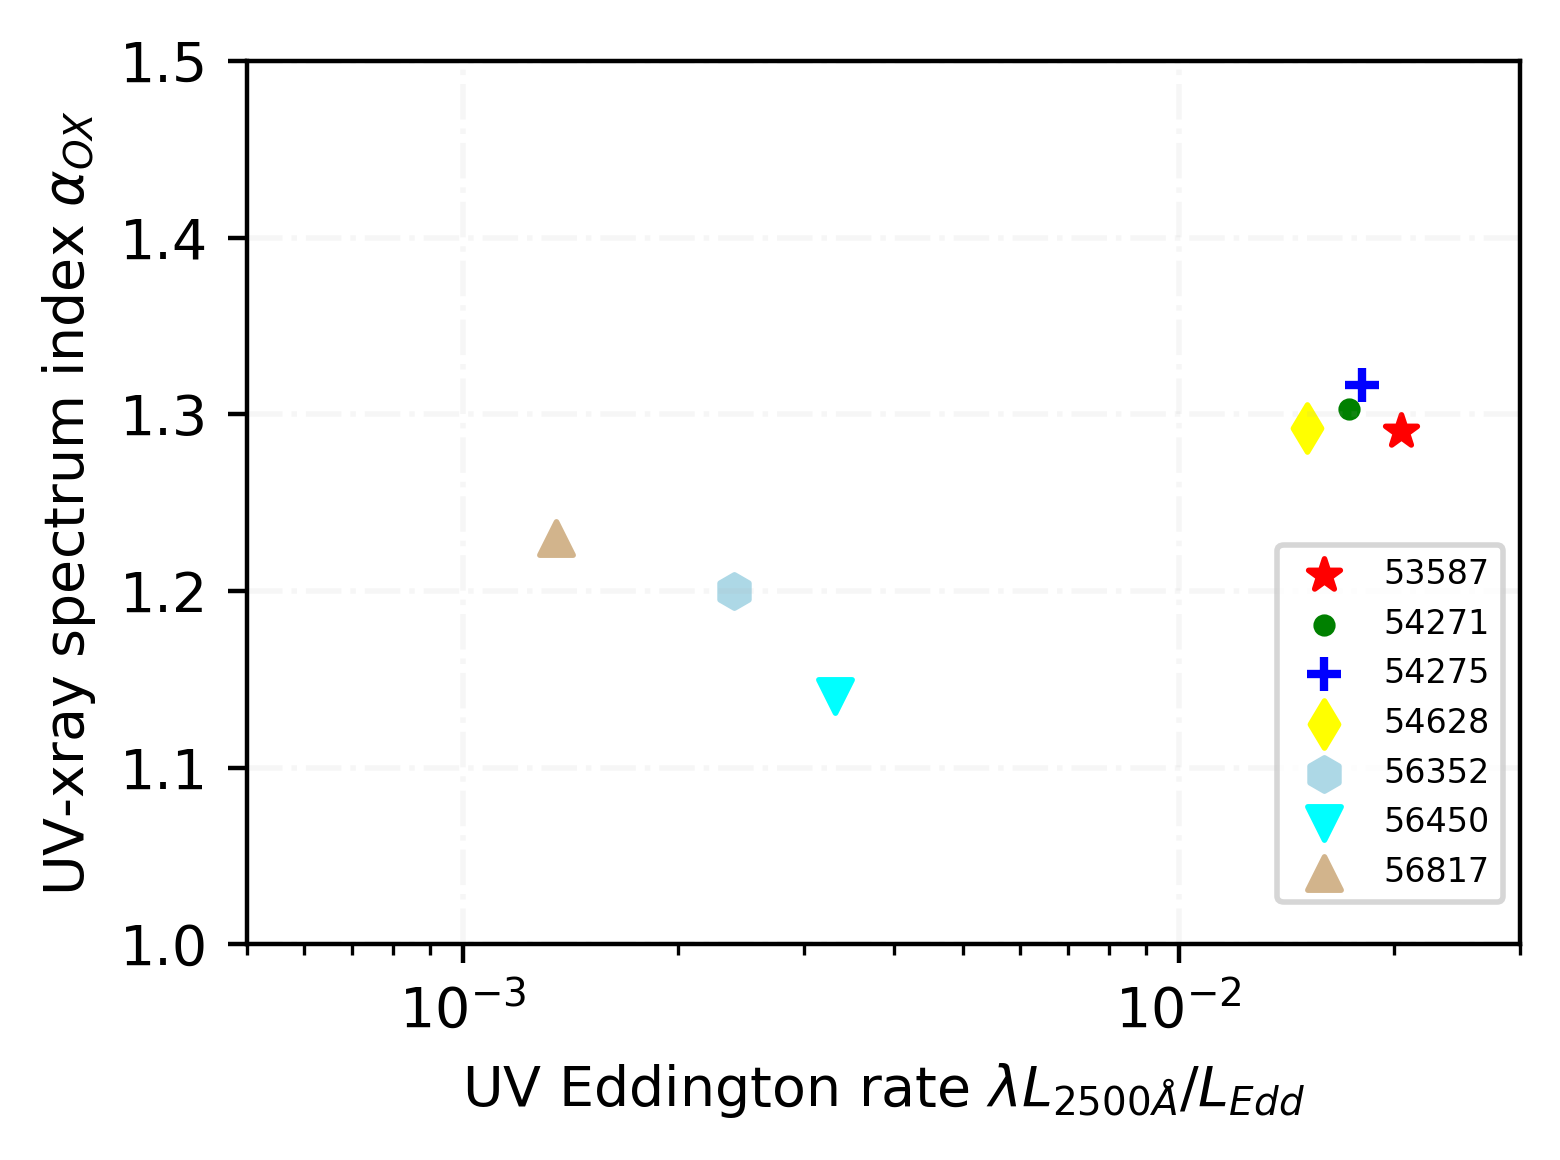

In [21]:
from astropy.cosmology import FlatLambdaCDM,Planck13,Planck15,z_at_value
from astropy import units as u
import astropy
from astropy.cosmology import LambdaCDM
import matplotlib.pyplot as plt
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import numpy as np
from astropy.io import ascii
import matplotlib.colors as colors


cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)
#cosmo=FlatLambdaCDM(H0=73,Om0=0.3)
D_cm=cosmo.luminosity_distance(z=0.042436).to(u.cm)
BH_mass=10**7.84*u.solMass
Ledd=1.26*10**38*BH_mass/u.solMass


fig = plt.figure(figsize=(4,3),dpi=400)
ax = fig.add_subplot(111)

markers_pd=['*','.','+','d','h','v','^','x','>','1','2','3','4','8','p','P','<','H','X','D','|','_']
colors_pd=['red','green','blue','yellow','lightblue','cyan','tan','gold','sandybrown','olivedrab','chartreuse','darkgreen','m','skyblue','violet','crimson','aqua','purple','magenta','lime','turquoise','lightcyan','teal','indigo']

marker_dict = dict(zip(xt_uw1_2keV, markers_pd[:len(xt_uw1_2keV)]))
color_dict = dict(zip(xt_uw1_2keV, colors_pd[:len(xt_uw1_2keV)]))

f_2keV=4.836e17 #Hz
F_2keV=np.array(xf_uw1_2keV)#\nuF\nu

alpha_ox=1-(np.log10(uf_uw1_2keV)-np.log10(F_2keV))/(np.log10(f_uw1)-np.log10(f_2keV))
uw1_rate=4*np.pi*D_cm.value**2*np.array(uf_uw1_2keV)/Ledd  
xray_rate=4*np.pi*D_cm.value**2*np.array(F_2keV)/Ledd   
    #fig = plt.figure(figsize=(4,3),dpi=400)
    #ax = fig.add_subplot(111)
for i,j,k in zip(uw1_rate,alpha_ox,xt_uw1_2keV):
    m_=marker_dict[k]
    c_=color_dict[k]
    if int(k)<57429:
        plt.scatter(x=i,y=j,marker=m_,color=c_,label=int(k))

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.25),ncol=1,fontsize=6,loc='right')    

plt.semilogx()
plt.xlim(5e-4,0.3e-1)
plt.ylim(1,1.5)
plt.xlabel(r'UV Eddington rate $\lambda L_{2500\AA}/L_{Edd}$')
plt.ylabel(r'UV-xray spectrum index $ \alpha_{OX} $')
plt.style.use('default')

plt.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)
plt.tight_layout()
fig.savefig('Mrk1018_alpha_uvot_uw1_rate.png',dpi=400) 